# Week 4 tutorial - Classification

The materials used in this tutorial are based on the applied exercises provided in the book <font color="brown">"An Introduction to Statistical Learning with Applications in R"</font> (<a href="http://www-bcf.usc.edu/~gareth/ISL/">ISLR</a>). We are trying to demonstrate how to use R to build simple classification models and assess their performance on real-world datasets. Besides the exercises that we are going to cover in this tutorial, it is worth trying the other applied exercises by yourself in Section 4.7.

## Predicting the Moving Direction of Stock Market

This question should be answered using the **Weekly** data set, which is part of the <font color="red">ISLR</font> package. This data is similar in nature to the <font color="red">Smarket</font> data used in section 4.6 of ISLR, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010. The task is to predict whether the stock market went up or down on a specific date. We are going to explore four different methods, i.e.,

* Multiple logistic regression
* Linear Discriminant Analysis (LDA)
* Quadratic Discriminant Analysis (QDA)
* K-Nearest Neighbors (KNN)

Similar to the lab in Section 4.6, we are going to fit the four models with the Weekly data and analyze their predicting accuracy. Besides what has been covered in section 4.6, we will introduce more discussion in regard to the model performance. We suggest that you could finish the tutorial together with section 4.6.

We will first start with exploring the data in order to get familiar with the data, as we usually do in data analysis. It is always a good idea to understand your data with EDA.

In [29]:
library(ISLR)

In [30]:
head(Weekly)

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down


This dataset contains weekly percentage returns for the S&P 500 stock index between 1990 and 2010. It consists of  1089 observations on the following 9 variables. (The following detail is copied and pasted from <a href="https://cran.r-project.org/web/packages/ISLR/ISLR.pdf">here</a>)
* <font color="orange">Year</font> The year that the observation was recorded
* <font color="orange">Lag1</font> Percentage return for previous week
* <font color="orange">Lag2</font> Percentage return for 2 weeks previous
* <font color="orange">Lag3</font> Percentage return for 3 weeks previous
* <font color="orange">Lag4</font> Percentage return for 4 weeks previous
* <font color="orange">Lag5</font> Percentage return for 5 weeks previous
* <font color="orange">Volume</font> Volume of shares traded (average number of daily shares traded in billions)
* <font color="orange">Today</font> Percentage return for this week
* <font color="orange">Direction</font> A factor with levels <font color="red">Down</font> and <font color="red">Up</font> indicating whether the market had a positive or negative
return on a given week


We can have a look at the structure of <font color="orange">Weekly</font> using the <a href="https://stat.ethz.ch/R-manual/R-devel/library/utils/html/str.html">str()</a> function. The function will give us information of the data that you should know. For example, the data type of each column, the total number of observations, the total number of variables, etc. Note that the <font color="orange">Direction</font> is a categorical variable (or a factor) with two levels. In this task, we are going to build linear classification models to predict if the stock market will go up or go down. It is different from what you have learned in tutorial one, where the response variable is a continues variable.

In [31]:
str(Weekly)

'data.frame':	1089 obs. of  9 variables:
 $ Year     : num  1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 ...
 $ Lag1     : num  0.816 -0.27 -2.576 3.514 0.712 ...
 $ Lag2     : num  1.572 0.816 -0.27 -2.576 3.514 ...
 $ Lag3     : num  -3.936 1.572 0.816 -0.27 -2.576 ...
 $ Lag4     : num  -0.229 -3.936 1.572 0.816 -0.27 ...
 $ Lag5     : num  -3.484 -0.229 -3.936 1.572 0.816 ...
 $ Volume   : num  0.155 0.149 0.16 0.162 0.154 ...
 $ Today    : num  -0.27 -2.576 3.514 0.712 1.178 ...
 $ Direction: Factor w/ 2 levels "Down","Up": 1 1 2 2 2 1 2 2 2 1 ...


### 1 Produce some numerical and graphical summaries of the Weekly data. 

Do there appear to be any patterns?
In this task, we are going to perform exploratory data (EDA) analysis using different functions in order to uncover any patterns existing in the data if there are any. You can see that EDA taught in week 2 has been used in each analyses discussed so far in the tutorials. The <a href="https://stat.ethz.ch/R-manual/R-devel/library/base/html/summary.html">summary()</a> function is always a good start point.

In [32]:
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

The <a href="https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/boxplot.html">boxplot</a> (a.k.a. box and whisker diagram) is a standardized way of displaying the distribution of data based on the five number summary: minimum, first quartile, median, third quartile, and maximum.
<img src="./boxplot.png" alt="Explanation of boxplot" style="width:256px;height:256;">
Note the above figure is a screenshot taken from http://www.physics.csbsju.edu/stats/box2.html. 

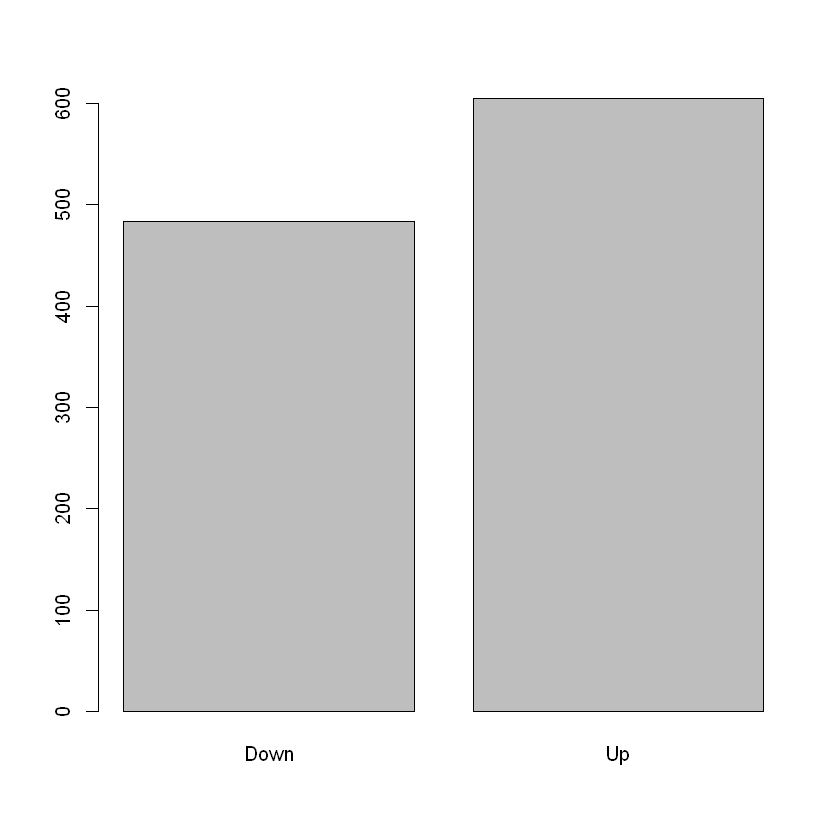

In [33]:
barplot(table(Weekly[,9]))

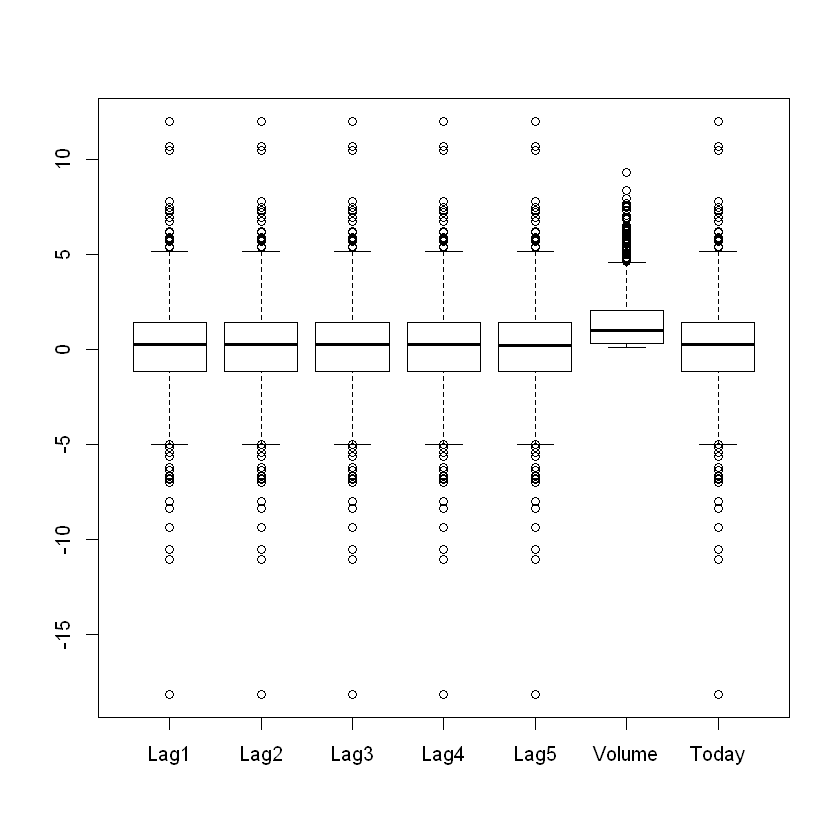

In [34]:
boxplot(Weekly[,-c(1,9)])

Note that we set the argument <font color="blue">las = 2</font> in order to draw the ticks on x-axis vertically. 

The plot shows that the variables <font color="orange">Today</font>, <font color="orange">Lag1</font>, <font color="orange">Lag2</font>, <font color="orange">Lag3</font>, <font color="orange">Lag4</font> and <font color="orange">Lag5</font> are distributed similarly with nearly he same quantiles and median. However, the distribution of <font color="orange">Volume</font> is skewed. Another usage of a boxplot is to detect outliers. Commonly real datasets will have surprisingly large maximums or surprisingly small minimums called outliers. If data points fall 3×IQR (interquartile range, i.e., the vertical length of the colored box in the above plot) or more above the third quartile or 3×IQR or more below the first quartile, we can treat those points as outliers. Do you find any outliers?

Now, we are going to study the correlation between variables. The function that you are going to use is <a href="https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/pairs.html">pairs()</a>, that generates a matrix of scatterplots to show us the pair-wise relationship between any two variables in the dataset. 

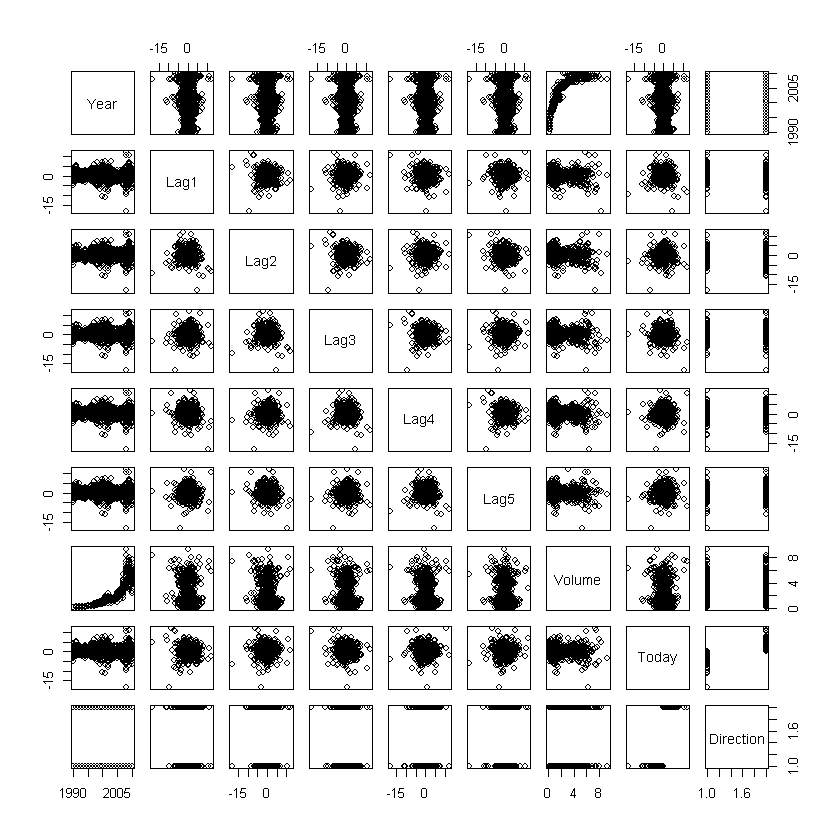

In [35]:
pairs(Weekly)

Are there any patterns that can be identified in the plots?

There is a non-linear and positive relationship between <font color="orange">Volume</font> and <font color="orange">Year</font>. The percentage return of this week, i.e., <font color="orange">Today</font>, is correlated with <font color="orange">Direction</font>. Can you tell what kind of correlation between the two variables?

Except for the above two patterns, no other patterns are discernible. Let's have a close look at the relationship between <font color="orange">Volume</font> and <font color="orange">Year</font> by taking the corresponding scatterplot out from the matrix.

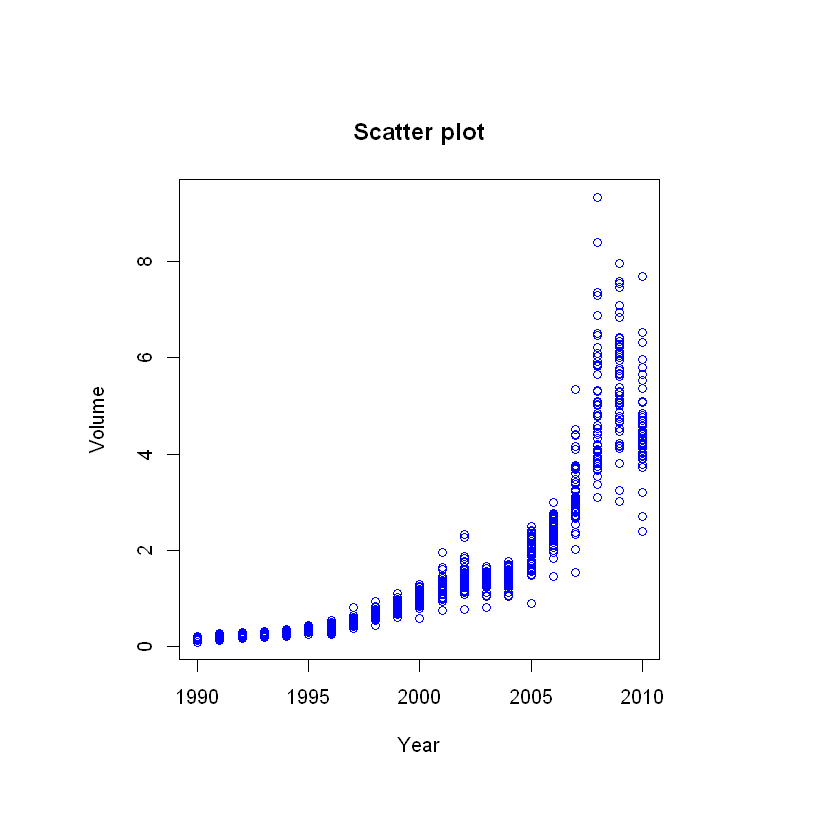

In [36]:
par(pin=c(4,4))
plot(Weekly$Year, Weekly$Volume, col = "blue", main='Scatter plot', ylab='Volume', xlab='Year')

It is clear that the traded volume increases while the year changes from 1990 to 2010. To quantify the correlation, we are going to use <font color="blue">cor()</font> and <font color="blue">levelplot()</font>. 

In [37]:
cor(Weekly$Year, Weekly$Volume)

[1] 0.8419416

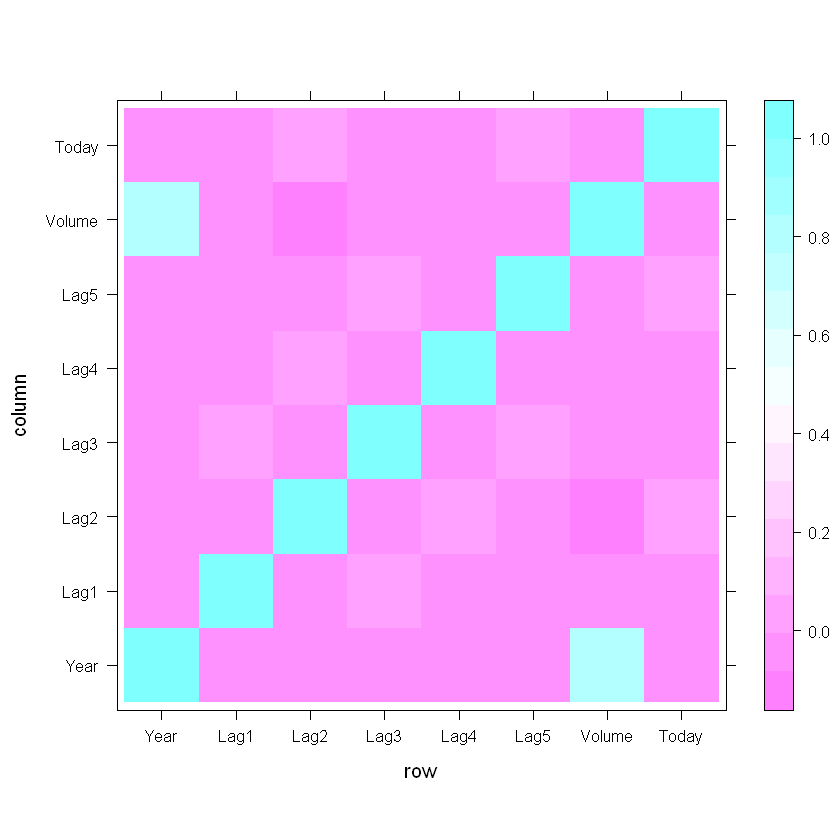

In [38]:
library(lattice)
levelplot(cor(Weekly[-9]))

The correlation matrix and the levelplot further show that there correlation between variables are very small, nearly 0, except for the pair of <font color="orange">Volume</font> and <font color="orange">Year</font>. Given such week correlation, how can we build a classification model to predict <font color="orange">Direction</font>? Indeed, predicting the movement of stock market is very hard.

### 2 Build a multiple logistic regression model to predict the direction of the stock market

Here we will use the full data set to perform a logistic regression with <font color="orange">Direction</font> as the response and the five <font color="orange">Lag</font> variables plus <font color="orange">Volume</font> as predictors, and use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones? 
The output shows that Lag2 is statistcally significant

In [39]:
fit.glm = glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = Weekly, family = binomial)

In [40]:
summary(fit.glm)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


How do we interpret the summary?

* Next we see the deviance residuals, a measure of model fit. This part of output shows the distribution of the deviance residuals for individual cases used in the model.
    * **Deviance residual** is a generalization of the idea of using the sum of squares of residuals in ordinary least squares to cases where model-fitting is achieved by maximum likelihood. It is the difference in $-2logL$ ($L$ is the model likelihood) between a maximal (saturated) model and the built model. It is a measure of badness of fit-higher number indicate worse fit. In other words, the high residual deviance shows that the model cannot be accepted to have been likely to generated the data.
    * Deviance residuals and regular residuals should have similar properties. Like the residuals in linear regression, the deviance residuals shown in the result should looks roughly symmetric. 

* The next part of the output shows the coefficients, their standard errors, the z-statistic (sometimes called a Wald z-statistic), and the associated p-values. Besides the intercept, the only predictor which has the significant association with the response variable (<font color="orange">Direction</font>) is <font color="orange">Lag2</font>, if we set $\alpha = 0.05$.
    * **Z-value**: The z-value is the regression coefficient divided by its standard error. It is also sometimes called the z-statistic. If the z-value is too big in magnitude (i.e., either too positive or too negative), it indicates that the corresponding true regression coefficient is not 0 and the corresponding X-variable matters.
    * Coefficient interpretation: The logistic regression coefficients give the change in the log odds of the outcome for a one unit increase in the predictor variable.

Note: The relationship between the regression coefficients, its standard error, the z-value, and the p-value is virtually identical in both logistic regression and regular least-squares regression. So if you understand this is in regular regression, you also understand it in logistic regression.

* Below the table of coefficients are fit indices, including the null and deviance residuals and the AIC. 
    * **Null deviance** indicates that if we assume the model is constant. In other words, the null deviance shows how well the response variable is predicted by a model that includes only the intercept
    * **Residual deviance** indicates how well the response variable is predicted with your model.
    * **The Akaike Information Criterion (AIC)** provides a method for assessing the quality of your model through comparison of related models.  It’s based on the Deviance, but penalizes you for making the model more complicated.  Much like adjusted R-squared, it’s intent is to prevent you from including irrelevant predictors. If you have more than one similar candidate models (where all of the variables of the simpler model occur in the more complex models), then you should select the model that has the smallest AIC. R defines AIC as
       * –2 maximized log-likelihood + 2 number of parameters

* **Fisher’s scoring algorithm** is a derivative of Newton’s method for solving maximum likelihood problems numerically. For the model above we see that Fisher’s Scoring Algorithm needed 4 iterations to perform the fit.This doesn’t really tell you a lot that you need to know, other than the fact that the model did indeed converge, and had no trouble doing it.

What can we see from the parameters of this model? Lags have somewhat similar effects, except for Lag 2. It seems like we can drop most of the Lag variables, but we can test that with the <a href="https://stat.ethz.ch/R-manual/R-devel/library/stats/html/anova.glm.html">anova()</a> function to give an analysis of deviance table, or the <a href="https://stat.ethz.ch/R-manual/R-devel/library/stats/html/add1.html">drop1()</a> function to try dropping each factors:

In [41]:
anova(fit.glm, test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,1088,1496.202,NA
Lag1,1,2.7373129,1087,1493.465,0.09802948
Lag2,1,5.2446489,1086,1488.220,0.02201437
Lag3,1,0.2611399,1085,1487.959,0.60933809
Lag4,1,0.9604164,1084,1486.999,0.32708199
Lag5,1,0.2623276,1083,1486.736,0.60852553
Volume,1,0.3793900,1082,1486.357,0.53792989


The difference between the null deviance and the residual deviance shows how our model is doing against the null model. Analyzing the table we can see the drop in deviance when adding each variable one at a time. The table shows that <font color="orange">Lag2</font> are statistically significant, if $\alpha = 0.05$.
The anova() test tries to adding the response variables only in the order given in the model formula. 
In order to carry out stepwise regression analysis, one can consider the use of the <a href="https://stat.ethz.ch/R-manual/R-devel/library/stats/html/add1.html">drop1(), add1()</a> and <a href="https://stat.ethz.ch/R-manual/R-devel/library/stats/html/step.html">step()</a> functions.

The following Chisq test tells us that our model as a whole does not fits significantly better than an empty model, as the p-value is quite large.

In [42]:
with(fit.glm, pchisq(null.deviance - deviance, df.null - df.residual, lower.tail = FALSE))

[1] 0.1313226

### 3 Compute the confusion matrix and overall fraction of correct predictions. 
In this task, we are going to predict the <font color="orange">Direction</font> variable based on our developed logistic regression model. Then, the confusion matrix is generated to show how many of the predicted directions match the true directions. You need to explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [43]:
probs <- predict(fit.glm, type = "response")
pred.glm <- rep("Down", length(probs))
pred.glm[probs > 0.5] <- "Up"
Direction = Weekly$Direction
table(pred.glm, Direction)

        Direction
pred.glm Down  Up
    Down   54  48
    Up    430 557

The matrix shows that the fitted model predicted that a total of 987 (430+557) observed returns would go up. Of these observations, 557 actually went up and 430 went down. Hence 430 out of 484 (88.8%) observed returns that actually went down were incorrectly labeled. The error rate is very high. In contrast, of 605 observed returns that actually went up, just 48 (7.9%) were missed by the logistic regression model. There are two terms, sensitivity and specificity, which are used to characterize the performance of a classifier. The sensitivity is the percentage of returns that actually went up are correctly identified, which is computed as 557/(557+48) = 92.1%. The specificity is the percentage of those that actually went down are correctly labeled, i.e., 1-88.8% = 11.2%. Therefore, it is clear that the sensitivity is quite high, but the specificity is very low.

The overall fraction of correct predictions on the training data is calculated using the following code: 

In [44]:
mean(pred.glm == Direction)

[1] 0.5610652

The fitted model has correctly predicted 56.1% of the directions in the data set. It is computed as (54+557)/(54+557+48+430) = 56.1%.

### 4 Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor.

Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010). Firstly, we split the whole dataset into training and testing. The training dataset contains the observed returns from 1990 to 2008. All the other observations are in testing set.

In [45]:
train = (Weekly$Year < 2009)
test = Weekly[!train,]
Direction.test = Weekly$Direction[!train]

Now, we fit a logistic regression with one predictor, i.e., <font color="orange">Lag2</font>, on the training dataset, as the previous analysis has shown that  <font color="orange">Lag2</font> has a strong association with the response variable.

In [47]:
fit.glm2 <- glm(Direction ~ Lag2, data = Weekly, family = binomial)

Does this model fit significantly better than the null model?

In [48]:
with(fit.glm2, pchisq(null.deviance - deviance, df.null - df.residual, lower.tail = FALSE))

[1] 0.01617449

If we choose $\alpha = 0.05$, the p-value shown above indicate that <font color='red'>fit.glm2</font> fits significantly better than the null model.

Similar, let's have a look at the predicting accuracy of the model with only one predictor.

In [49]:
probs2 <- predict(fit.glm2, test, type = "response")
pred.glm2 <- rep("Down", length(probs2))
pred.glm2[probs2 > 0.5] <- "Up"
table(pred.glm2, Direction.test)

         Direction.test
pred.glm2 Down Up
     Down    9  5
     Up     34 56

The overall fraction of correct predictions on the test dataset is:

In [50]:
mean(pred.glm2 == Direction.test)

[1] 0.625

When we use the new model (<font color="red">fit.glm2</font>), we can predict the directions in test data correctly by rate of 62.5%. 

Now, let's use the <font color="blue">confusionMatrix()</font> function from the R library called <font color="red">caret</font>. The documentation of all the functions in caret can be found https://cran.r-project.org/web/packages/caret/caret.pdf

In [51]:
library(caret)

Loading required package: ggplot2


In [52]:
confusionMatrix(table(pred.glm2, Direction.test), positive='Up') 

Confusion Matrix and Statistics

         Direction.test
pred.glm2 Down Up
     Down    9  5
     Up     34 56
                                         
               Accuracy : 0.625          
                 95% CI : (0.5247, 0.718)
    No Information Rate : 0.5865         
    P-Value [Acc > NIR] : 0.2439         
                                         
                  Kappa : 0.1414         
 Mcnemar's Test P-Value : 7.34e-06       
                                         
            Sensitivity : 0.9180         
            Specificity : 0.2093         
         Pos Pred Value : 0.6222         
         Neg Pred Value : 0.6429         
             Prevalence : 0.5865         
         Detection Rate : 0.5385         
   Detection Prevalence : 0.8654         
      Balanced Accuracy : 0.5637         
                                         
       'Positive' Class : Up             
                                         

What are the other statistics? For example,

* No information rate:  the largest proportion of the observed classes
* P-Value [Acc > NIR]: A hypothesis test is also computed to evaluate whether the overall accuracy rate is greater than the rate of the largest class
* Sensitivity: the percentage of observed returns that actually went up are correctly identified. 
* Specificity: the percentage of observed returns that acutally went down are correctly identified.

Some reading materials that might be of your interest:
    * Measure model performance: http://topepo.github.io/caret/other.html
    

### 5 Repeat <font color="red">4</font> using LDA.
In this task, we are going to develop another classification model using Linear Discriminant Analysis. To apply this method, we need to load <font color="red">MASS</font> library. The documentation of the library can be download <a href="https://cran.r-project.org/web/packages/MASS/MASS.pdf">here</a>. Please refer to it for the specification of its functions. The function that you are going to use is <a href="https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/lda.html">lda()</a>.

In [53]:
library(MASS)

In [70]:
fit.lda = lda(Direction ~ Lag2, data = Weekly)
fit.lda

Call:
lda(Direction ~ Lag2, data = Weekly)

Prior probabilities of groups:
     Down        Up 
0.4444444 0.5555556 

Group means:
            Lag2
Down -0.04042355
Up    0.30428099

Coefficients of linear discriminants:
           LD1
Lag2 0.4251523

In [71]:
pred.lda = predict(fit.lda, test, type = "response")
pred.lda

,Down,Up
986,0.4727454,0.5272546
987,0.3461246,0.6538754
988,0.5155494,0.4844506
989,0.5166386,0.4833614
990,0.4795680,0.5204320
991,0.4577412,0.5422588
992,0.3688306,0.6311694
993,0.5211494,0.4788506
994,0.5530496,0.4469504
995,0.5169809,0.4830191


Now, you should generate the confusion matrix by calling confusionMatrix():

In [72]:
confusionMatrix(pred.lda$class, Direction.test) 

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down    9  5
      Up     34 56
                                         
               Accuracy : 0.625          
                 95% CI : (0.5247, 0.718)
    No Information Rate : 0.5865         
    P-Value [Acc > NIR] : 0.2439         
                                         
                  Kappa : 0.1414         
 Mcnemar's Test P-Value : 7.34e-06       
                                         
            Sensitivity : 0.20930        
            Specificity : 0.91803        
         Pos Pred Value : 0.64286        
         Neg Pred Value : 0.62222        
             Prevalence : 0.41346        
         Detection Rate : 0.08654        
   Detection Prevalence : 0.13462        
      Balanced Accuracy : 0.56367        
                                         
       'Positive' Class : Down           
                                         

When we use the model (<font color="red">fit.lda</font>), we can correctly predict the directions of the returns by 62.5%, which is the sames as the simple logistic regression model above. The matrix also shows that the sensitivity score is very high, but the specificity score is very lower. The fitted model nearly mis-classified all the returns that actually went down.

### 6 Repeat <font color="red">4</font> using QDA.
In this task, we are going to develop another classification model using Quadratic Discriminant Analysis. QDA has a similar generative process to LDA. But instead of assuming all the classes share the same covariance matrix, QDA assumes that each class has its own covariance matrix. To fit a QDA model, you should call the <a href="https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/qda.html">qda()</a> function.

In [73]:
fit.qda = qda(Direction ~ Lag2, data = Weekly)
fit.qda

Call:
qda(Direction ~ Lag2, data = Weekly)

Prior probabilities of groups:
     Down        Up 
0.4444444 0.5555556 

Group means:
            Lag2
Down -0.04042355
Up    0.30428099

Similar to what you have done for LDA, here you need to generate the confusion matrix to assess the predicting accuracy of the model.

In [74]:
pred.qda = predict(fit.qda, test, type = "response")
confusionMatrix(pred.qda$class, Direction.test) 

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down    0  0
      Up     43 61
                                          
               Accuracy : 0.5865          
                 95% CI : (0.4858, 0.6823)
    No Information Rate : 0.5865          
    P-Value [Acc > NIR] : 0.5419          
                                          
                  Kappa : 0               
 Mcnemar's Test P-Value : 1.504e-10       
                                          
            Sensitivity : 0.0000          
            Specificity : 1.0000          
         Pos Pred Value :    NaN          
         Neg Pred Value : 0.5865          
             Prevalence : 0.4135          
         Detection Rate : 0.0000          
   Detection Prevalence : 0.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : Down            
                                          

The above output shows that the overall accuracy of the fitted QDA model is 58.65%, which is lower than the accuracy score yielded by the fitted LDA model. Having a close look at the confusion matrix, you will find that QDA has predicted that all returns would go up, which results in sensitivity is 1.0, and specificity is 0.0.

### 7 Repeat <font color="red">4</font> using KNN with K = 1.

The last classifier that we are going to fit is K-Nearest Neighbor. We are going to use the <a href="https://stat.ethz.ch/R-manual/R-devel/library/class/html/knn.html">knn()</a> function in <font color="red">class</font> library. The KNN classifier first identifies the $K$ points in the training data that are closest to the test observation. Then according to the class labels of the K pints, KNN applies Bayes rule and classifies the test observation to the class with the highest probabilities. See section 2.2.3 of ISLR. 

In [75]:
library(class)

In [76]:
train.X <- as.matrix(Weekly$Lag2[train])
test.X <- as.matrix(Weekly$Lag2[!train])
train.Direction <- Weekly$Direction[train]
set.seed(1)
pred.knn <- knn(train.X, test.X, train.Direction, k = 1)
confusionMatrix(pred.knn, Direction.test, positive="Up")

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down   21 30
      Up     22 31
                                          
               Accuracy : 0.5             
                 95% CI : (0.4003, 0.5997)
    No Information Rate : 0.5865          
    P-Value [Acc > NIR] : 0.9700          
                                          
                  Kappa : -0.0033         
 Mcnemar's Test P-Value : 0.3317          
                                          
            Sensitivity : 0.5082          
            Specificity : 0.4884          
         Pos Pred Value : 0.5849          
         Neg Pred Value : 0.4118          
             Prevalence : 0.5865          
         Detection Rate : 0.2981          
   Detection Prevalence : 0.5096          
      Balanced Accuracy : 0.4983          
                                          
       'Positive' Class : Up              
                                          

The accuracy of the fitted KNN model is 50%, no better than random.

### 8 Which of these methods appears to provide the best results on this data?

According to the accuracy rate, <font color="red">fit.glm2</font> and <font color="red">fit.lda</font> models provide the best results in terms of overall accuracy.